In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import matplotlib.dates as mdates
import numpy as np

In [2]:
listafile=glob.glob("2023*.csv")

In [3]:
data=[]
for files in listafile:
  data.append(pd.read_csv(files))
datafull=pd.concat(data,ignore_index=True)

In [4]:
datafull

,Datetime,Humedad,Temperatura,Presion
0,2023-10-04 16:24:08,37.12,35.67,810.23
1,2023-10-04 16:25:06,37.37,35.83,810.23
2,2023-10-04 16:25:51,37.10,35.64,810.25
3,2023-10-04 16:26:36,37.37,35.62,810.24
4,2023-10-04 16:27:22,37.45,35.56,810.24
...,...,...,...,...
947,2023-10-26 20:00:02,40.45,36.27,812.12
948,2023-10-26 20:30:01,39.60,36.15,812.41
949,2023-10-26 21:00:02,40.14,36.22,812.67
950,2023-10-26 21:30:02,40.07,36.09,813.00


In [5]:
Time=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S")

In [6]:
datafull2=datafull.drop("Datetime",axis=1)

In [7]:
datafull2.insert(0,"Tiempo",Time,True)

In [8]:
datagood=datafull2.sort_values(by="Tiempo",ignore_index=True)

In [9]:
datagood['Presion'].replace(0,np.nan,inplace=True) #Converti los 0 a nan

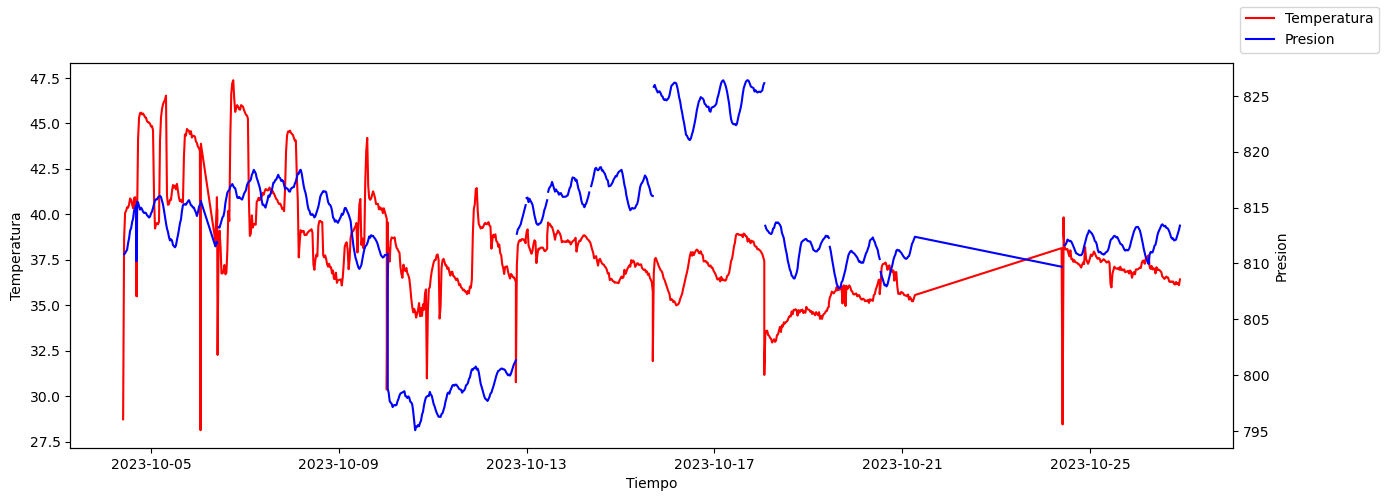

In [10]:
fig,(ax1)=plt.subplots(figsize=(15,5))
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Temperatura")
ax1.plot(datagood['Tiempo'],datagood[' Temperatura'],label="Temperatura",color="r")
#ax1.plot(datagood['Tiempo'],datagood['Humedad'],label="Humedad",color="g")
#fig.autofmt_xdate()
ax2=ax1.twinx()
ax2.set_ylabel("Presion")
ax2.plot(datagood['Tiempo'],datagood['Presion'],label=("Presion"),color="b")
fig.legend()

El primer dia los datos varían mucho debido a que estaba siendo ajustado el raspberry, pero se obvservan como los siguientes dias los datos son muy parecidos la temperatura tiene pequeños cambios pero sigue una tendencia entre los 35 y 38 grados, en la humedad si hay mas variación pero tambien sigue una tendencia, pero en las mediciones de la presión se obvserva que casi se mantuvo constante todos los días.

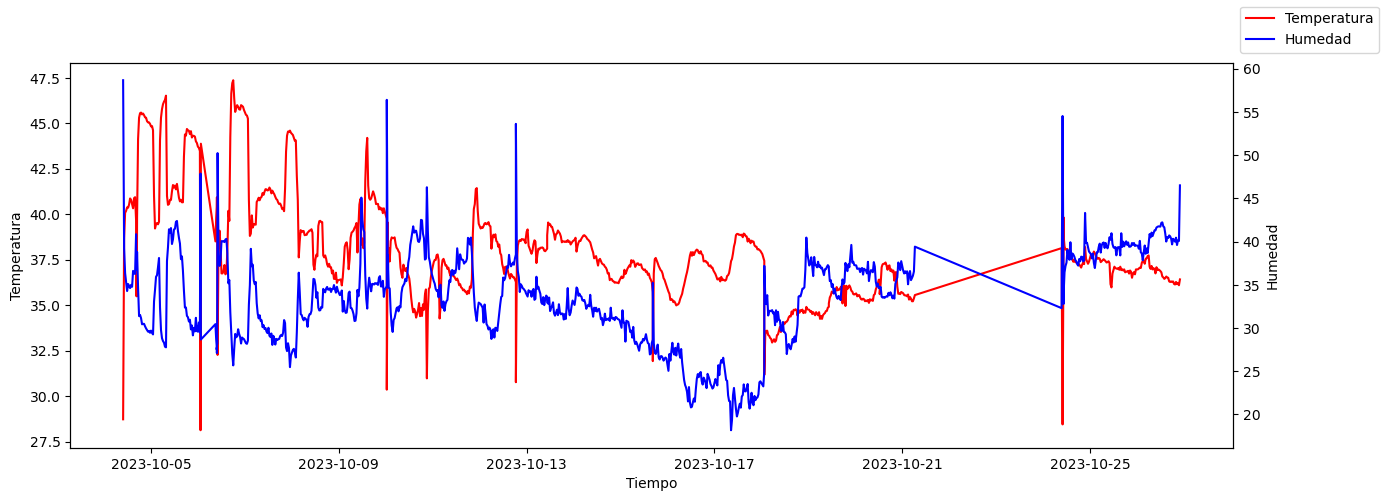

In [11]:
fig,(ax1)=plt.subplots(figsize=(15,5))
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Temperatura")
ax1.plot(datagood['Tiempo'],datagood[' Temperatura'],label="Temperatura",color="r")
#Empiezo con el ax2
ax2=ax1.twinx()
ax2.set_ylabel("Humedad")
ax2.plot(datagood['Tiempo'],datagood['Humedad'],label=("Humedad"),color="b")
fig.legend()

In [12]:
datagood['Presion'].interpolate(method="polynomial",order=2,inplace=True) #Se interpolaron los datos usando el metodo polinomial cuadrado

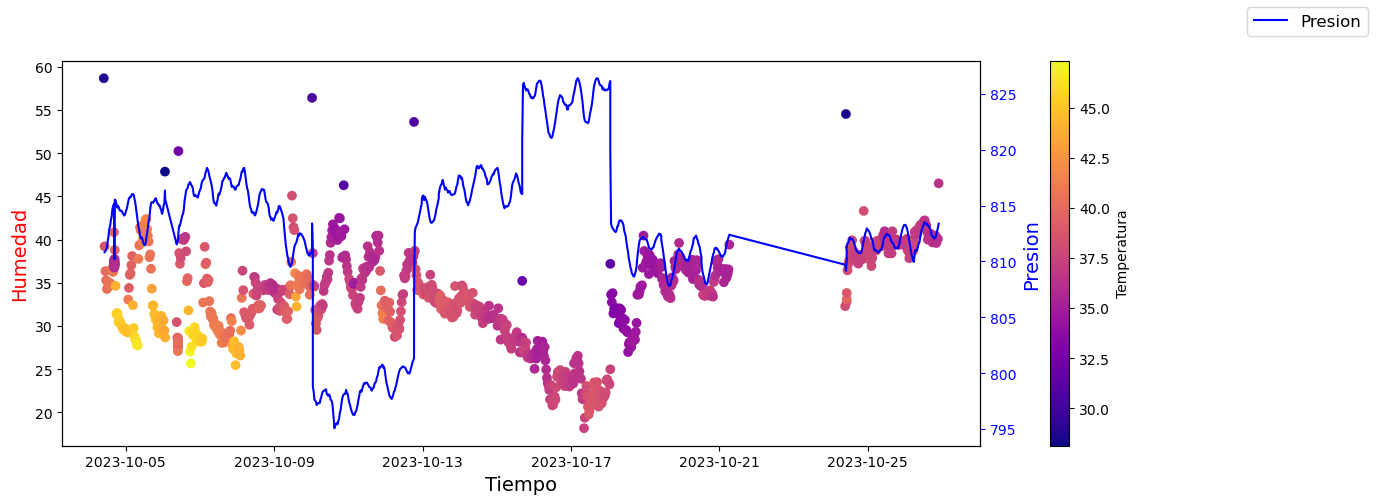

In [13]:
fig,(ax1)=plt.subplots(figsize=(15,5))
ax1.set_xlabel(("Tiempo"),fontsize=14)
ax1.set_ylabel(("Humedad"),color="r",fontsize=14)
#ax1.scatter(datagood['Tiempo'], datagood['Humedad'], c=datagood[' Temperatura'], cmap='plasma') 
#plt.colorbar(label="Temperatura")
T=ax1.scatter(datagood['Tiempo'], datagood['Humedad'], c=datagood[' Temperatura'], cmap='plasma') #Converti el scatter en una variable para poder aplicar el cbar ya que el cbar no se aplica en el scatter.
plt.colorbar(T,ax=ax1,label="Temperatura",pad=0.06) #La barra de coloeres con respecto a la Temp
#fig.autofmt_xdate()
ax2=ax1.twinx()
ax2.set_ylabel(("Presion"),color="b",fontsize=14)
ax2.plot(datagood['Tiempo'],datagood['Presion'],label=("Presion"),color="b")
ax2.tick_params(color="b",labelcolor="b")
fig.legend(fontsize=12)

 No se logro hacer lo comentado ya que el colorbar(cbar) necesitaba con que apoyarse para poder hacer los colores y es por eso que el scatter lo volvi una variable para que el cbar tuviera de donde agarrar los datos